# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyhigh import get_elevation_batch

# Variables

In [5]:
lucas_filepath = "../data/soil/LUCAS 2018 TOPSOIL data/LUCAS-SOIL-2018-v2/LUCAS-SOIL-2018.csv"
metadata_filepath = "../data/soil/lucas_cover_attr.csv"

# Read DataFrames

In [6]:
# Read LUCAS 2018 Data
lucas = pd.read_csv(lucas_filepath)
lucas.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


In [7]:
# Read Cover Attributes table
cover = pd.read_csv(metadata_filepath)
cover.head()

/var/folders/2w/cw97zdb154l5t4cjzcg4xx8m0000gn/T/ipykernel_70877/3587497158.py:2: DtypeWarning: Columns (6,13,28,30,31,33,34,35,38,39,40,41,43,44,45,47,50,51,52,54,55,56,57,58,67,68,69,70,71,81,83,88,89,93,95,97,99,101,102,103,109,119) have mixed types. Specify dtype option on import or set low_memory=False.
  cover = pd.read_csv(metadata_filepath)


,id,point_id,year,nuts0,nuts1,nuts2,nuts3,th_lat,th_long,office_pi,...,file_path_gisco_north,file_path_gisco_south,file_path_gisco_east,file_path_gisco_west,file_path_gisco_point,gps_geom,th_geom,trans_geom,pointidyear,file_path_ftp_cover
0,104676,30602386,2006,ES,ES1,ES12,NaN,43.392554,-5.651470,NaN,...,NaN,NaN,NaN,NaN,NaN,0101000020E6100000422619390B9B16C02788BA0F40B2...,0101000020E610000077C760D221163DC09EEB9E7EC8FC...,NaN,3.060239e+11,https://jeodpp.jrc.ec.europa.eu/ftp/jrc-openda...
1,6631,33082184,2006,ES,ES4,ES41,NaN,42.017288,-2.246961,NaN,...,NaN,NaN,NaN,NaN,NaN,0101000020E6100000B6BE4868CBF901C02046088F3602...,0101000020E61000007E721D2F23163DC07480207ACBFC...,NaN,3.308218e+11,https://jeodpp.jrc.ec.europa.eu/ftp/jrc-openda...
2,365650,33041710,2006,ES,ES6,ES62,NaN,37.778490,-1.507173,NaN,...,NaN,NaN,NaN,NaN,NaN,0101000020E6100000E8F692C6681DF8BFF2CD3637A6E3...,0101000020E6100000974C3EA925163DC09B4457DAC9FC...,NaN,3.304171e+11,https://jeodpp.jrc.ec.europa.eu/ftp/jrc-openda...
3,351002,30221632,2006,ES,ES6,ES61,NaN,36.648601,-4.497319,NaN,...,NaN,NaN,NaN,NaN,NaN,0101000020E61000003E963E7441FD11C0C21726530553...,0101000020E61000002D403FC225163DC0022E9DE2C5FC...,NaN,3.022163e+11,https://jeodpp.jrc.ec.europa.eu/ftp/jrc-openda...
4,355468,34802072,2006,ES,ES2,ES24,NaN,41.245907,-0.024265,NaN,...,NaN,NaN,NaN,NaN,NaN,0101000020E61000006E6DE179A9D898BFF1F109D9799F...,0101000020E6100000FE95DE0024163DC00F33457FCDFC...,NaN,3.480207e+11,https://jeodpp.jrc.ec.europa.eu/ftp/jrc-openda...


### Select 2018 Data Only

In [6]:
# Select year = 2018
cover = cover[cover['year']==2018]

In [8]:
print(f"Number of Cover Attribute Samples for 2018: {len(cover)}")
print(f"Number of Unique Cover Attribute Samples: {cover['point_id'].nunique()}")
print()
print(f"Number of LUCAS Point Samples for 2018: {len(lucas)}")
print(f"Number of Unique LUCAS Samples: {lucas['POINTID'].nunique()}")


Number of Cover Attribute Samples for 2018: 874646
Number of Unique Cover Attribute Samples: 413082

Number of LUCAS Point Samples for 2018: 18984
Number of Unique LUCAS Samples: 18984


# Merge Datasets

Using POINTID as a primary key, join the two tables together. Use an inner join, so any samples which don't match get dropped.

In [9]:
# Inner join
merged = lucas.merge(cover, how='inner', left_on='POINTID', right_on='point_id')
print(f"Number of samples from inner join: {len(merged)}")

print(f"\nNumber of features in the merged dataframe: {len(merged.columns)}")

Number of samples from inner join: 73465

Number of features in the merged dataframe: 149


# Data Cleaning

## Drop nulls and <LOD in predictor columns

In [ ]:
# Features which need LOD checking
pred_cols = ['OC', 'N']
other_pred_cols = ['CaCO3', 'P', 'K']

In [ ]:
# Find out how many null values or "<LOD" entries there are for each laboratory tested feature
for col in pred_cols + other_pred_cols:
    null_count = merged[col].isnull().sum()
    nonull_df = merged[~merged[col].isnull()]
    str_count = len(nonull_df[nonull_df[col].str.contains('<')])
    print(f"Column {col} contains {null_count} nulls and {str_count} string values.")

Column OC contains 1 nulls and 26 string values.
Column N contains 1 nulls and 9 string values.
Column CaCO3 contains 7494 nulls and 9 string values.
Column P contains 25 nulls and 4783 string values.
Column K contains 1 nulls and 38 string values.


In [ ]:
# Drop null rows and those containing "<" for predictor columns
print(f"Length of dataframe before removal: {len(merged)}")
for col in ['N', 'OC']:
    merged = merged[~merged[col].isnull()]
    merged = merged[~merged[col].str.contains("<")]
print(f"Length of remaining dataframe: {len(merged)}")

# Replace string values in other columns with the value half way between 0 and LOD
lod_halfway = {'CaCO3': 0.5,
               'P': 5.0,
               'K': 5.0}

# Replace all those <LOD (not target variables) with the value that is half the LOD
for col in other_pred_cols:
    merged.loc[merged[col].astype(str).str.contains("<", na=False), col] = lod_halfway[col]

Length of dataframe before removal: 18123
Length of remaining dataframe: 18093


## Convert Features to Numerical or Date Format

In [ ]:
# Create lists of the numerical columns and the date columns
cat_to_num_cols = ['lc1_perc', 'lc2_perc', 'lu1_perc', 'lu2_perc', 'soil_stones_perc', ] + pred_cols + other_pred_cols
datetime_cols = ['survey_date', 'SURVEY_DATE']

In [15]:
# Convert categorical columns to numerical
for cat in cat_to_num_cols:
    merged[cat] = merged[cat].astype(float)

# Convert date columns to datetime
for col in datetime_cols:
    merged[col] = pd.to_datetime(merged[col])

/var/folders/2w/cw97zdb154l5t4cjzcg4xx8m0000gn/T/ipykernel_40575/2380907417.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged[col] = pd.to_datetime(merged[col])


# Filters

#### Depth == `0-20cm`

In [ ]:
len_before = len(merged)

# Select samples within the top 20cm of topsoil
merged = merged[merged['Depth'].isin(['0-20 cm'])]

# Drop filter columns
filter_cols = ['Depth']
merged = merged.drop(columns=filter_cols, errors='ignore')

len_after = len(merged)
print(f"Rows removed: {len_before - len_after}")

Rows removed: 234


#### GPS Precision
* Identify the optimal precision
* Filter by values under this precision only

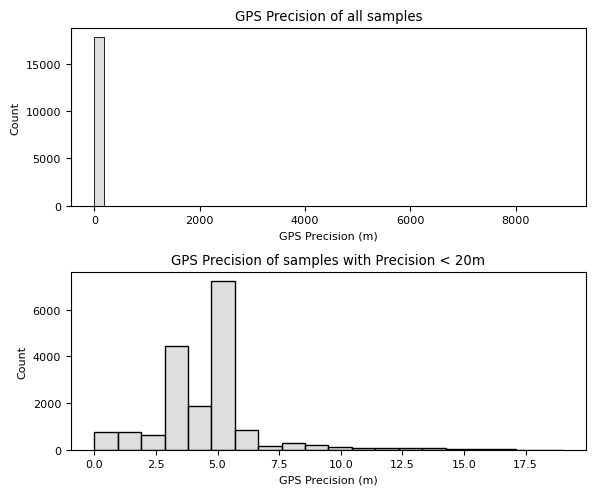

In [ ]:
# Histogram showing the spread of precision values
plt.rcParams.update({'font.size': 8})
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(6)
sns.histplot(merged['gps_prec'], bins=50, ax=ax1, color='lightgrey')
ax1.set_xlabel("GPS Precision (m)")
ax1.set_title("GPS Precision of all samples")

# Filter precision by <20m and plot the histogram again to see the spread without outliers
precision = 20
higher_prec = merged[merged['gps_prec'] < precision]
sns.histplot(higher_prec['gps_prec'], bins=precision, ax=ax2, color='lightgrey')
ax2.set_title(f"GPS Precision of samples with Precision < {precision}m")
plt.xlabel("GPS Precision (m)")
plt.tight_layout()
plt.savefig('./graphs/soil/gps_prec_hist.png', dpi=300)
plt.show()

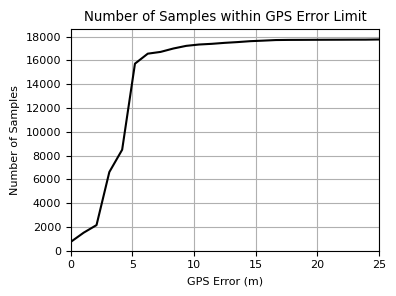

In [18]:
# Graph showing how many samples there are for each filter
prec_values = np.linspace(0,26,26)
number_of_samples = [len(merged[merged['gps_prec']<=val]) for val in prec_values]

fig, ax = plt.subplots()
sns.lineplot(x=prec_values, y=number_of_samples, color='black')
fig.set_figheight(3)
fig.set_figwidth(4)
plt.xticks(range(0,26,5))
plt.yticks(range(0,19000,2000))
plt.title("Number of Samples within GPS Error Limit")
plt.xlabel("GPS Error (m)")
plt.xlim(0, 25)
plt.ylim(0)
plt.ylabel("Number of Samples")
plt.grid()
plt.tight_layout()
plt.savefig('./graphs/soil/gps_prec_line.png', dpi=300)
plt.show()

In [19]:
# Starting dataframe size
len_before = len(merged)

# Select 10m as the gps_precision
precision = 10

# Filter by 10m precision
merged = merged[merged['gps_prec'] <= precision]

len_after = len(merged)
lost_samples = len_before - len_after
print(f"Remaining Samples: {len(merged)}")
print(f"Samples removed: {lost_samples}")

Remaining Samples: 17342
Samples removed: 517


### GPS Coordinate System - All values the Same so remove column

In [20]:
checkpoint1 = merged.copy()

In [54]:
merged = checkpoint1.copy()

In [55]:
# Filter by gps_proj then remove the column
merged = merged[merged['gps_proj']=='WGS84']

### Distance between theoretical and GPS location

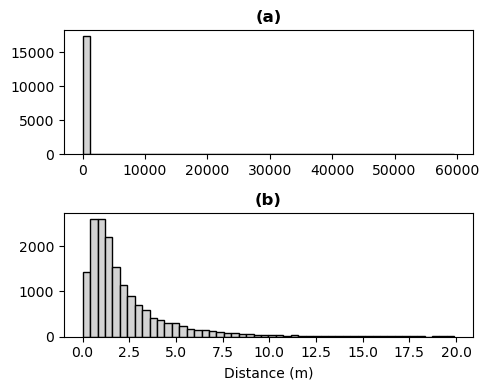

In [ ]:
# Histogram showing the spread of precision values
plt.rcParams.update({'font.size': 10})
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(4)
fig.set_figwidth(5)
ax1.hist(merged['th_gps_dist'], bins=50, color='lightgrey', edgecolor='black')
ax1.set_title("(a)", fontweight="bold")
ax2.hist(merged[merged['th_gps_dist'] < 20]['th_gps_dist'], bins=50, color='lightgrey', edgecolor='black')
ax2.set_xlabel("Distance (m)")
ax2.set_title("(b)", fontweight="bold")
plt.tight_layout()
plt.savefig('../graphs/soil/th_gps_dist_histplot.png', dpi=300)
plt.show()

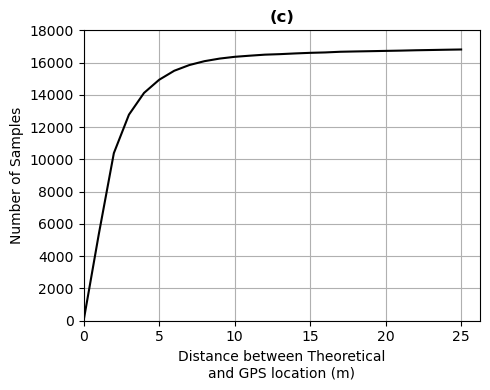

In [ ]:
# Graph showing how many samples there are for each filter
prec_values = range(0,26,1)
number_of_samples = [len(merged[merged['th_gps_dist']<=val]) for val in prec_values]

fig, ax = plt.subplots()
sns.lineplot(x=prec_values, y=number_of_samples, color='black')
fig.set_figheight(4)
fig.set_figwidth(5)
plt.xticks(range(0,26,5))
plt.yticks(range(0,19000,2000))
# plt.title("Number of Samples within GPS to\nTheoretical Distance Limit")
plt.title("(c)", fontweight="bold")
plt.xlabel("Distance between Theoretical\nand GPS location (m)")
plt.ylabel("Number of Samples")
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.savefig('../graphs/soil/th_gps_dist_lineplot.png', dpi=300)
plt.show()

In [39]:
# Within 20m kept 
len_before = len(merged)
merged = merged[merged['th_gps_dist'] <= 20]
len_after = len(merged)
removed = len_before - len_after
print(f"Remaining Samples: {len(merged)}")
print(f"Samples removed: {removed}")

Remaining Samples: 16725
Samples removed: 617


#### Elevation

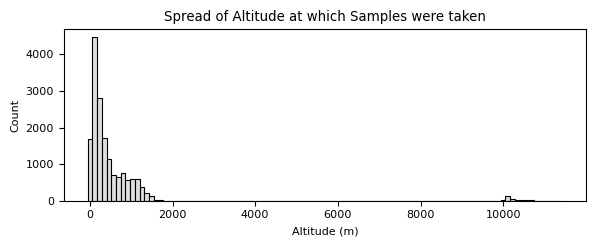

In [ ]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 8})

fig.set_figheight(2.5)
fig.set_figwidth(6)

sns.histplot(merged['Elev'], bins=100, color='lightgrey', edgecolor="black", linewidth=0.8)
ax.set_title("Spread of Altitude at which Samples were taken")
plt.tight_layout()
plt.xlabel("Altitude (m)")
plt.savefig('../graphs/soil/elevation_histplot.png', dpi=300)
plt.show()

In [41]:
# Figure out what's going on with elevation > 10000
merged[merged['Elev']>10000][['POINTID', 'Elev', 'gps_lat', 'gps_long', 'NUTS_0']].head(15)

,POINTID,Elev,gps_lat,gps_long,NUTS_0
46,47302860,10613,48.71439,15.56197,AT
54,47482864,10444,48.73774,15.81010,AT
55,47502772,10869,47.91153,15.74224,AT
59,47522872,10470,48.80657,15.87274,AT
370,45582678,11369,47.17061,13.12459,AT
391,43702704,10943,47.44773,10.64921,AT
396,43862700,11104,47.41025,10.86059,AT
397,43902682,11145,47.24773,10.91080,AT
398,43962686,10690,47.28306,10.99066,AT
399,44042690,10701,47.31809,11.09709,AT


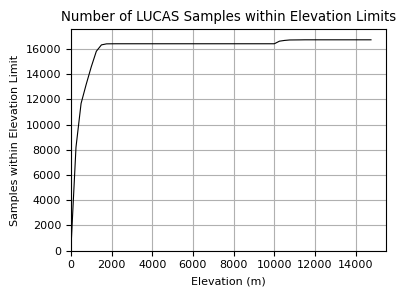

In [ ]:
# Graph showing how many samples there are for each filter
prec_values = range(0,15000,250)
number_of_samples = [len(merged[merged['Elev']<=val]) for val in prec_values]

plt.figure(figsize=(4,3))
plt.plot(prec_values, number_of_samples, color="black", linewidth=0.8)
plt.xticks(range(0,15000,2000))
plt.xlabel('Elevation (m)')
plt.ylabel("Samples within Elevation Limit")
plt.title("Number of LUCAS Samples within Elevation Limits")
plt.grid()
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.savefig('../graphs/soil/elevation_lineplot.png', dpi=300)

plt.show()

In [ ]:
len_before = len(merged)
merged = merged[merged['Elev']<=2000]
len_after = len(merged)

change = len_before - len_after
print(f"Samples removed: {change}")

Samples removed: 316


### Land Cover

#### lc_lu_special_remark - damaged areas

In [44]:
# Split by areas with damaged land
damaged = ['Burnt area', 'Temporary flooded', 'Temporary dry',
           'Nursery', 'Dump site', 'Fire break']

bad_area = df[df['lc_lu_special_remark'].isin(damaged)]
good_area = df[~df['lc_lu_special_remark'].isin(damaged)]

# impact on soil properties
props_of_interest = ['N', 'pH_H2O', 'OC', 'K']
print("Areas with burns, floods, etc.")
print(f"Total samples: {len(bad_area)}")
print(bad_area[props_of_interest].describe().round(2))
print()

print("Areas with no recorded damage")
print(f"Total samples: {len(good_area)}")
print(good_area[props_of_interest].describe().round(2))

Areas with burns, floods, etc.
Total samples: 72
       pH_H2O
count   72.00
mean     6.26
std      1.35
min      3.83
25%      5.03
50%      6.09
75%      7.66
max      8.27

Areas with no recorded damage
Total samples: 18051
         pH_H2O
count  18050.00
mean       6.23
std        1.32
min        3.34
25%        5.09
50%        6.25
75%        7.46
max       10.43


In [45]:
# Remove rows where land is in damaged region
before = len(merged)
merged = merged[~merged['lc_lu_special_remark'].isin(damaged)]
after = len(merged)

print(f"Samples removed: {before - after}")

Samples removed: 69


### Filter by Land Use Type

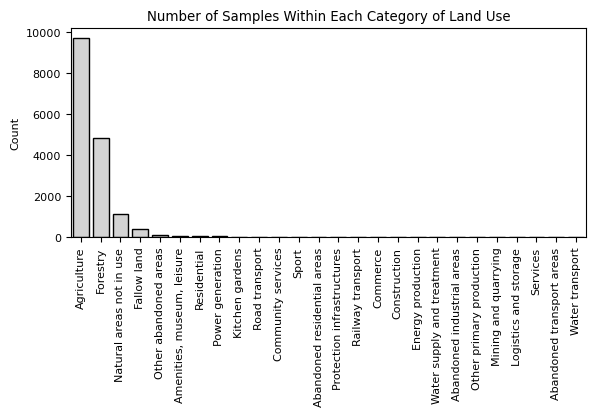

In [47]:
plot_df = merged.groupby("LU1_Desc").count().reset_index().sort_values(by="POINTID", ascending=False)
plot_df = plot_df.replace({"Agriculture (excluding fallow land and kitchen gardens)": "Agriculture",
                 "Amenities, museum, leisure (e.g. parks, botanical gardens)": "Amenities, museum, leisure",
                 "Semi-natural and natural areas not in use": "Natural areas not in use",
                 "Electricity, gas and thermal power distribution": "Power generation",
                 "Financial, professional and information services": "Services"})
plt.figure(figsize=(6,8))
sns.barplot(plot_df, x="LU1_Desc", y="POINTID", color="lightgrey", edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Number of Samples Within Each Category of Land Use")
plt.tight_layout()
plt.subplots_adjust(bottom=0.7)
plt.savefig('./graphs/soil/land_use_barplot.png', dpi=300)
plt.show()

In [33]:
# List of accepted land uses
before = len(merged)
accept_lu = [
    "Agriculture (excluding fallow land and kitchen gardens)",
    "Forestry",
    "Semi-natural and natural areas not in use",
    "Fallow land"
]
merged = merged[merged['LU1_Desc'].isin(accept_lu)]
after = len(merged)
print(f"Samples removed: {before - after}")

Samples removed: 360


## Transformations

### GPS East-West

If `gps_ew` == 'West', then make sure the sign on `gps_long` is negative.

In [395]:
checkpoint2 = merged.copy()

In [416]:
merged = checkpoint2.copy()

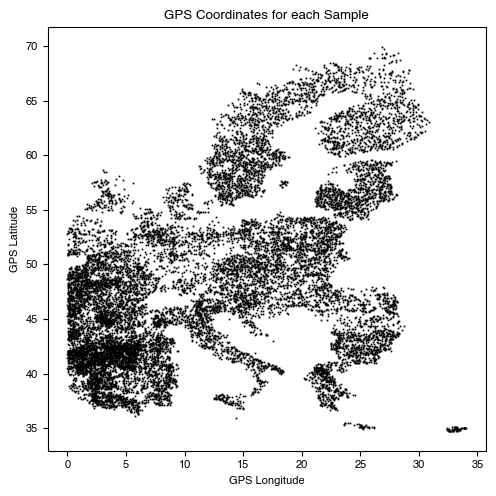

In [417]:
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 8})
plt.xlabel("GPS Longitude")
plt.ylabel("GPS Latitude")
plt.scatter(merged['gps_long'], merged['gps_lat'], s=0.2, marker='x', color="black")
plt.title("GPS Coordinates for each Sample")
plt.tight_layout()
plt.savefig('./graphs/soil/gps_loc_before_fixing.png', dpi=300)
plt.show()

In [418]:
def correct_gps_long(row):
    if row['gps_long'] > 0 and row['gps_ew'].lower()=='west':
        return -row['gps_long']
    else:
        return row['gps_long']
    
merged['gps_long'] = merged.apply(correct_gps_long, axis=1)

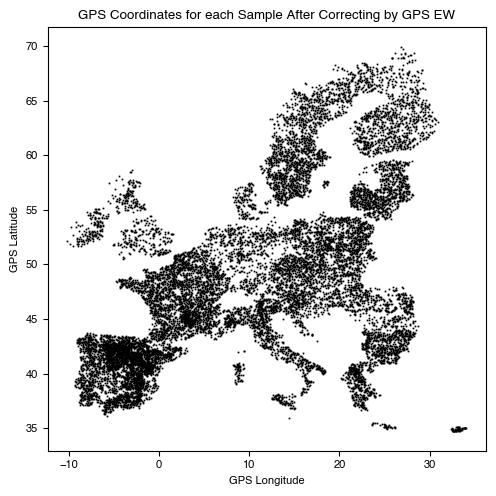

In [419]:
plt.figure(figsize=(5,5))
plt.scatter(merged['gps_long'], merged['gps_lat'], s=0.2, marker='x', color="black")
plt.title("GPS Coordinates for each Sample After Correcting by GPS EW")
plt.xlabel("GPS Longitude")
plt.ylabel("GPS Latitude")
plt.tight_layout()
plt.savefig('./graphs/soil/gps_loc_after_fixing.png', dpi=300)
plt.show()

## Add Country Names

In [420]:
# Load in country name csv
country_codes_filename = "data/other/iso_regional_codes.csv"
country = pd.read_csv(country_codes_filename)

In [421]:
# Replace column names in the country codes df
country_codes = country[['name', 'alpha-2']].rename(columns={'name': 'country_name'})

# Merge the country names with the original df
merged = merged.merge(country_codes, how='left', left_on='NUTS_0', right_on='alpha-2')

# Find out how many null values remain
print(f"Number of null values in country name: {merged['country_name'].isnull().sum()}")

Number of null values in country name: 891


In [424]:
# Greece and UK
merged.loc[merged['NUTS_0']=='EL', 'country_name'] = 'Greece'
merged.loc[merged['NUTS_0']=='UK', 'country_name'] = 'United Kingdom'

# Netherlands is called "Netherlands, Kingdom of the"
merged = merged.replace(to_replace="Netherlands, Kingdom of the", value='Netherlands', regex=True)

## Replace Grass Margins with Yes or No

In [464]:
merged['lm_grass_margins'] = merged['lm_grass_margins'].apply(lambda x: "No" if x == 'No' else "Yes")

## Null Handling

### Replace all % values above 100 with NaN

In [426]:
columns = merged.columns.tolist()
perc_cols = [column for column in columns if "perc" in column]

for col in perc_cols:
    print(f"{col} contains {len(merged[merged[col]>100])} values over 100%")
    merged.loc[merged[col]>100, col] = np.nan

lc1_perc contains 0 values over 100%
lc2_perc contains 6193 values over 100%
lu1_perc contains 0 values over 100%
lu2_perc contains 7031 values over 100%
cprn_impervious_perc contains 0 values over 100%
soil_stones_perc contains 13 values over 100%


### Replace "Not Relevant"

In [427]:
# Create a mask of where "Not relevant" appears in the dataframe
mask = merged.apply(lambda col: col.astype(str).str.contains("Not relevant", na=False))

# Get column names where at least one value matches "Not relevant"
columns_with_not_relevant = mask.any()[mask.any()].index.tolist()

print(f"Number of columns containing 'Not Relevant': {len(columns_with_not_relevant)}")
print("Columns:", columns_with_not_relevant)

Number of columns containing 'Not Relevant': 22
Columns: ['obs_dist', 'lc1_spec_label', 'lc2_label', 'lc2_spec_label', 'lu2_label', 'tree_height_maturity', 'tree_height_survey', 'feature_width', 'cprn_cando', 'cprn_lc_label', 'eunis_complex', 'grass_cando', 'wm', 'wm_source', 'wm_type', 'wm_delivery', 'erosion_cando', 'soil_blk_0_10_taken', 'soil_blk_10_20_taken', 'soil_blk_20_30_taken', 'soil_std_taken', 'soil_org_depth_cando']


In [428]:
# Replace 'not relevant' with null
merged = merged.replace("Not relevant", np.nan)

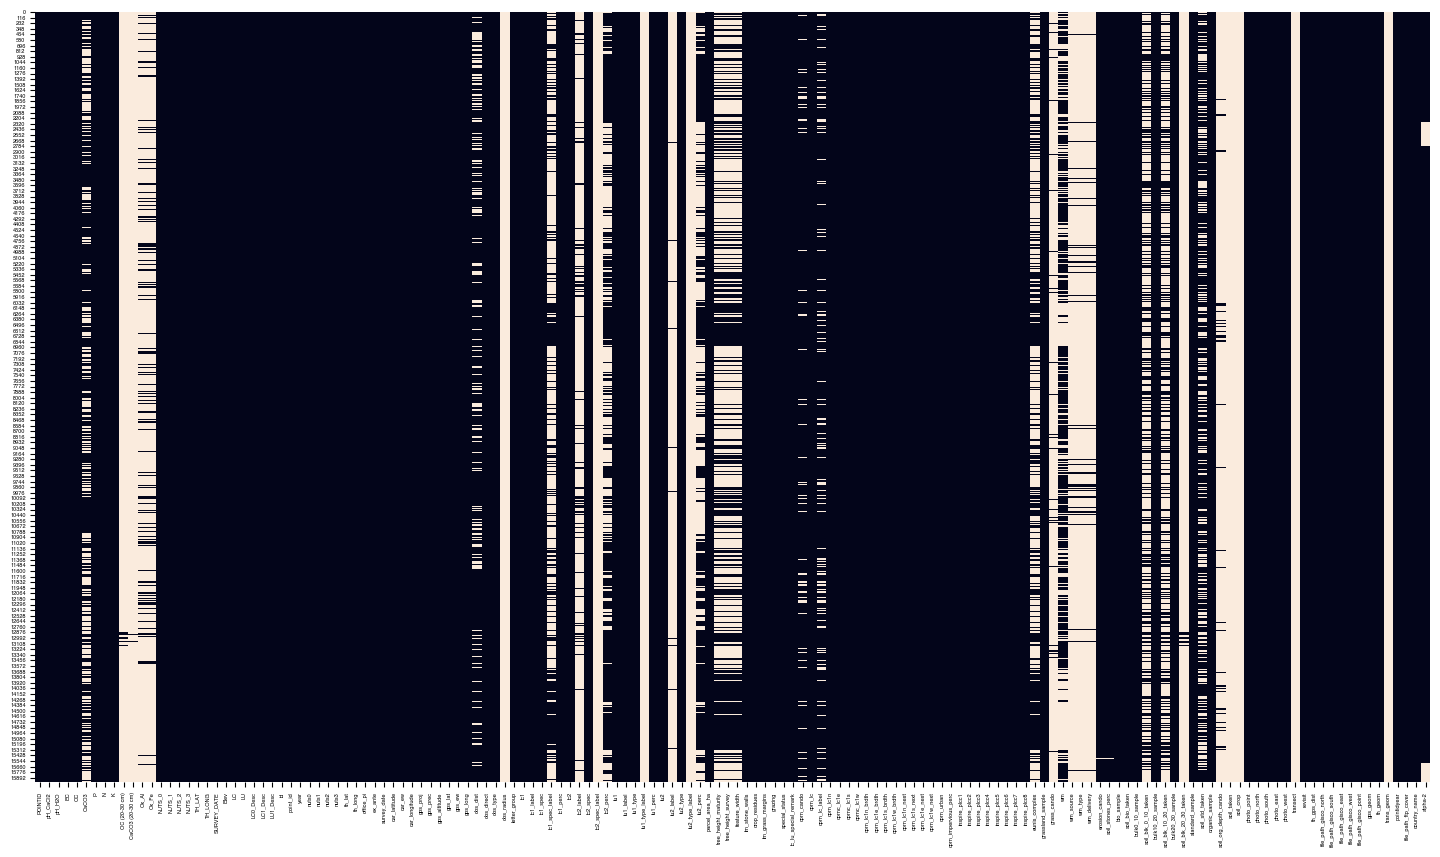

In [429]:
# visualise null values
plt.rcParams.update({'font.size': 4})
plt.figure(figsize=(18,10))
sns.heatmap(merged.isnull(), cbar=False)
plt.show()

ValueError: Axis limits cannot be NaN or Inf

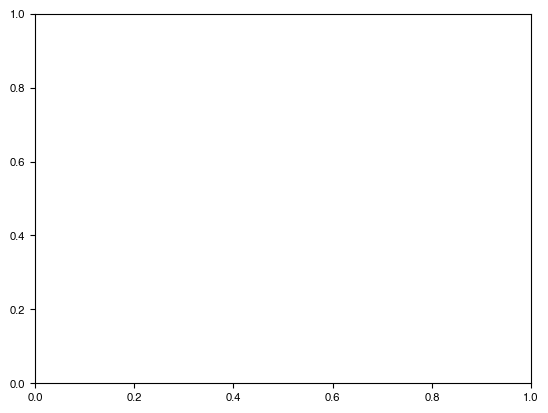

In [500]:
# Find columns with high number of nulls 
column_nulls = pd.DataFrame(merged.isnull().sum()).reset_index().rename(
    columns={'index': 'column_name', 0: 'null_count'}).sort_values(by='null_count', ascending=False)
column_nulls_only = column_nulls[column_nulls['null_count']>0]

width = 8
height = 4
plt.rcParams.update({'font.size': 8,
                    'font.sans-serif':'Helvetica'})

fig, ax = plt.subplots()
sns.barplot(column_nulls_only, x='column_name', y='null_count', ax=ax, legend=False, zorder=2, color='lightgrey',
            linewidth=1, edgecolor=".1", width=0.6)
ax.set_ylim(top=column_nulls_only['null_count'].max() * 1.14)
fig.set_figheight(height)
fig.set_figwidth(width)
plt.title(f"Null Count by Feature (Only Columns with Nulls)")
plt.xlabel("Feature")
plt.ylabel("Null Count")
plt.tight_layout()
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=90)
for cont in ax.containers:
    ax.bar_label(cont, fontsize=6, rotation=90, label_type='edge', padding=2)
# plt.tight_layout()
plt.subplots_adjust(bottom=0.4)
plt.savefig('./graphs/soil/null_count.png', dpi=300)
plt.show()

In [431]:
print(f"Columns containing nulls: {len(column_nulls_only)}")

Columns containing nulls: 40


### Remove Features with over 1000 Nulls

In [432]:
# Drop columns with nulls over 1000
null_limit = 1000
null_cols_to_drop = column_nulls[column_nulls['null_count']>1000]['column_name'].tolist()
merged = merged.drop(columns=null_cols_to_drop)

print(f"Number of columns remaining: {len(merged.columns.tolist())}")

Number of columns remaining: 115


In [433]:
# Drop rows with  Null
merged = merged[~merged['P'].isnull()]
merged = merged[~merged['soil_stones_perc'].isnull()]
merged = merged[~merged['EC'].isnull()]

In [434]:
# Find columns with high number of nulls 
column_nulls = pd.DataFrame(merged.isnull().sum()).reset_index().rename(
    columns={'index': 'column_name', 0: 'null_count'}).sort_values(by='null_count', ascending=False)
column_nulls[column_nulls['null_count']>0]

,column_name,null_count
114,alpha-2,884


## Remove Irrelevant Columns

Considered to have information in them not relevant, or duplicate. 

In [476]:
cols_to_remove = [
    'id', # Point ID used as identifier instead
    'point_id', 'year', 'nuts0', 'nuts1', 'nuts2', 'nuts3', 'pointidyear', # Duplicates from cover attribute table
    'NUTS_1', 'NUTS_2', 'NUTS_3', # Too fine-grained detail, regional variation covered through land use, cover and weather
    'TH_LAT', 'TH_LONG', 'th_lat', 'th_long', # Theoretical, not actual
    'office_pi', 'ex_ante', # All values are 0.0
    'survey_date', # Duplicate of SURVEY_DATE
    'car_latitude', 'car_longitude', 'car_ew', # Not useful - doesn't say anything about the coordinates of the sample
    'gps_altitude', # Duplicate of Elev
    'obs_direct', # Not relevant
    'lm_stone_walls', # Too few values "Yes"
    'LC', 'LU', # Coded values of LC0_Desc and LU1_Desc, duplicated
    'lc1', 'lc1_label', 'lc1_spec', # Duplicates of land cover and land use LC0_Desc and LC1_Desc
    'lc2', 'lc2_label', 'lc2_spec', 'lc2_spec_label', 'lc2_perc', # Duplicates
    'lu1', 'lu1_label', 'lu1_type', 'lu1_type_label', 'lu1_perc', # Duplicates
    'lu2', 'lu2_label', 'lu2_type', 'lu2_type_label', 'lu2_perc', # Duplicates
    'cprn_lc', 'cprn_lc_label', # Duplicates of LC1_Desc
    'cprn_lc1n', 'cprnc_lc1e', 'cprnc_lc1s', 'cprnc_lc1w', # Most values are 88.0 - null/Not relevant
    'cprn_lc1n_brdth', 'cprn_lc1e_brdth', 'cprn_lc1s_brdth', 'cprn_lc1w_brdth', # Same as above
    'cprn_lc1n_next', 'cprn_lc1s_next', 'cprn_lc1e_next', 'cprn_lc1w_next', # Most 88.0 and not useful
    'cprn_urban', 'cprn_impervious_perc', # Urban environments will be filtered using LC1_Desc anyway
    'inspire_plcc1', 'inspire_plcc2', 'inspire_plcc3', 'inspire_plcc4', # Mostly 888.0
    'inspire_plcc5', 'inspire_plcc6', 'inspire_plcc7', 'inspire_plcc8', # Mostly 888.0
    'grassland_sample', 'erosion_cando', 'bio_sample', # Not relevant and <1000 samples with a different value 
    'soil_bio_taken', # Mostly "Not relevant" and not a useful feature anyway
    'bulk0_10_sample', 'bulk10_20_sample', 'bulk20_30_sample', # Admin feature, not helpful for modelling
    'soil_blk_0_10_taken', 'soil_blk_10_20_taken', 'soil_blk_20_30_taken', # Admin feature, not helpful for modelling
    'standard_sample', 'soil_std_taken', # Over null limit and admin feature, not helpful for modelling
    'organic_sample', 'soil_org_depth_cando', # Admin feature, not helpful for modelling
    'photo_point', 'photo_north', 'photo_south', 'photo_east', 'photo_west', # Admin feature, not helpful for modelling
    'file_path_gisco_north', 'file_path_gisco_south', 'file_path_gisco_east', # Admin feature, not helpful for modelling
    'file_path_gisco_west', 'file_path_gisco_point', # Admin feature, not helpful for modelling
    'gps_geom', 'th_geom', # Not using geometries for modelling
    'file_path_ftp_cover', # Admin feature, not helpful for modelling
    'revisit', # Admin feature, not helpful for modelling
    'Depth', 'gps_proj', 'gps_prec', 'gps_altitude', 'lc_lu_special_remark', 'alpha-2', 'NUTS_0', 'gps_ew', # Used as filters
    'special_status',
    'th_gps_dist',
    'letter_group',
    'pH_CaCl2', 'pH_H2O', 'EC', 'P', 'K',
    'obs_type'
]

print(f"Number of features being removed: {len(cols_to_remove)}")
merged = merged.drop(columns=cols_to_remove, errors='ignore')
print(f"Columns remaining: {len(merged.columns.tolist())}")

Number of features being removed: 113
Columns remaining: 17


In [480]:
merged[merged.Elev < 0]

,POINTID,OC,N,SURVEY_DATE,Elev,LC0_Desc,LC1_Desc,LU1_Desc,gps_lat,gps_long,lc1_perc,parcel_area_ha,crop_residues,lm_grass_margins,grazing,soil_stones_perc,country_name
1660,44763430,370.6,30.9,2018-05-23,-40,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,53.95432,12.361170,100.0,> 10 ha,No,Yes,No signs of grazing,0.0,Germany
1662,44963472,15.4,1.8,2018-07-26,-45,Cropland,Rape and turnip rape,Agriculture (excluding fallow land and kitchen...,54.32518,12.689700,10.0,> 10 ha,Yes,Yes,No signs of grazing,5.0,Germany
1745,41423356,75.2,6.7,2018-11-06,-2,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,53.28229,7.315775,100.0,1 - 10 ha,No,Yes,No signs of grazing,0.0,Germany
1752,41643396,21.6,2.0,2018-12-09,-50,Woodland,Broadleaved woodland,Forestry,53.64841,7.625672,100.0,1 - 10 ha,No,No,No signs of grazing,0.0,Germany
1760,41783392,55.8,6.1,2018-12-09,-47,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,53.61636,7.839035,100.0,1 - 10 ha,No,No,Signs of grazing,0.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14309,45523900,31.8,2.5,2018-09-23,-6,Grassland,Grassland with sparse tree/shrub cover,Forestry,58.14443,13.918470,100.0,< 0.5 ha,No,No,No signs of grazing,0.0,Sweden
15132,48004522,46.2,2.0,2018-07-13,-16,Woodland,Spruce dominated coniferous woodland,Forestry,63.50567,19.604530,100.0,> 10 ha,No,No,No signs of grazing,0.0,Sweden
15262,48704758,8.6,0.5,2018-08-10,-12,Woodland,Spruce dominated coniferous woodland,Forestry,65.50971,21.846380,100.0,> 10 ha,No,No,No signs of grazing,0.0,Sweden
15310,49204796,161.9,9.5,2018-08-14,-14,Woodland,Pine dominated mixed woodland,Forestry,65.76609,23.066360,100.0,> 10 ha,No,No,No signs of grazing,0.0,Sweden


# Save as CSV

In [498]:
print(f"Number of samples: {len(merged)}")
print(f"Number of features: {len(merged.columns)}")

Number of samples: 15941
Number of features: 18


In [499]:
merged.to_csv("./data/cleaned_data/250627_lucas_2018_cleaned.csv", index=False)

## Initial Data Exploration

In [438]:
# Create a copy of the dataframe to make analysis easier
df = merged.copy()

### Countries

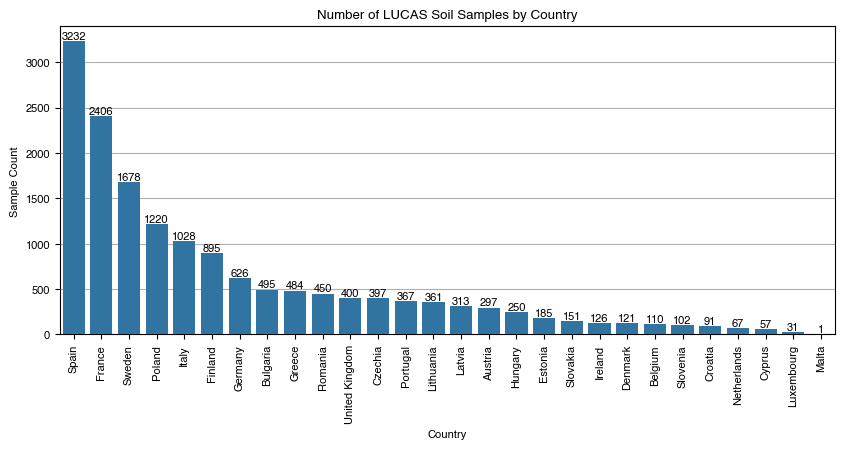

In [439]:
country_df = df.groupby(['country_name']).size().reset_index(name='counts')
country_df = country_df.sort_values(by='counts', ascending=False)

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)
plt.grid(zorder=0)
sns.barplot(country_df, x='country_name', y='counts', zorder=3)
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Sample Count")
ax.set_title("Number of LUCAS Soil Samples by Country")

plt.show()